In [9]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Deli,1952
1,Fury,1923
2,Petticoat Pirates,1961
3,Hvem myrder hvem?,1978
4,MVP: Most Valuable Primate,2000


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [1]:
c = cast[(cast.character == "Superman") | (cast.character == "Batman")]
d = c.groupby(['year', 'character']).size()
d = d.unstack()
d = d.fillna(0)

e = d.Superman - d.Batman
print ("Superman Years: " + str(len(e[e >0])))

NameError: name 'cast' is not defined

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [6]:
c = cast[(cast.character == "Superman") | (cast.character == "Batman")]
d = c.groupby(['year', 'character']).size()
d = d.unstack()
d = d.fillna(0)

e = d.Superman - d.Batman
print ("Batman Years: " + str(len(e[e <0])))

Batman Years: 24


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

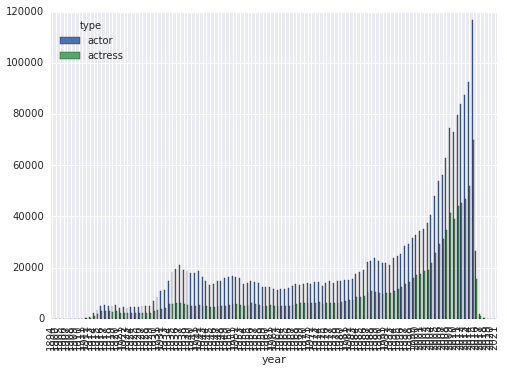

In [25]:
c = cast.groupby(['year', 'type']).size()
c = c.unstack()
c.plot(kind="bar")

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

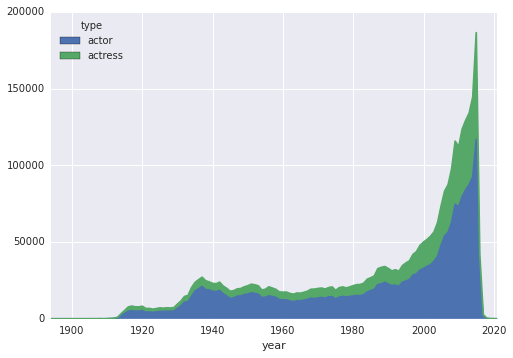

In [24]:
c = cast.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind="area")

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

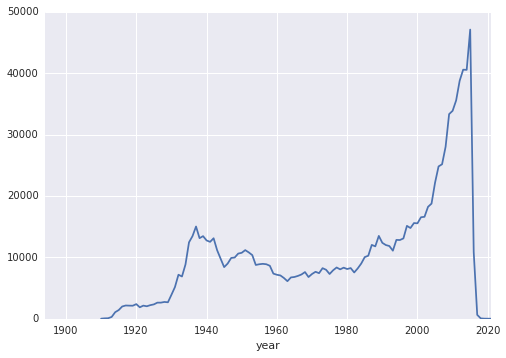

In [27]:
c = cast.groupby(['year', 'type']).size()
c = c.unstack("type")
d = c.actor-c.actress
d.plot()


### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

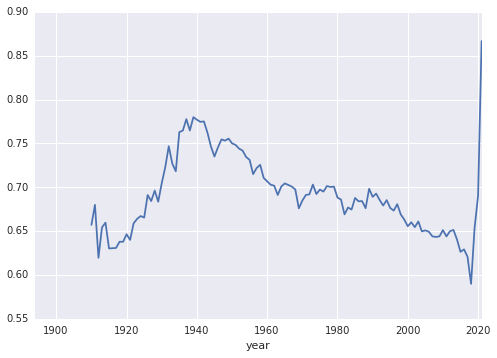

In [28]:
c = cast.groupby(['year', 'type']).size()
c = c.unstack("type")
d = c.actor/(c.actor+c.actress)

d.plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

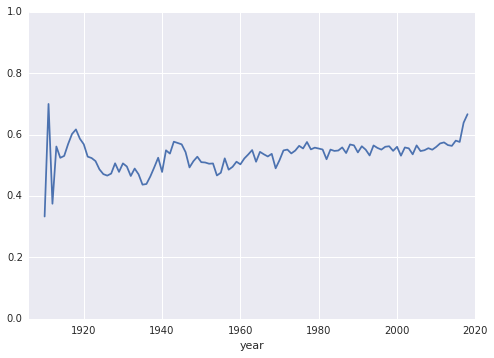

In [51]:
c = cast[cast.n==2].groupby(['year', 'type']).size()
c = c.unstack("type")
d = c.actor/(c.actor+c.actress)

d.plot(ylim = (0,1))

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

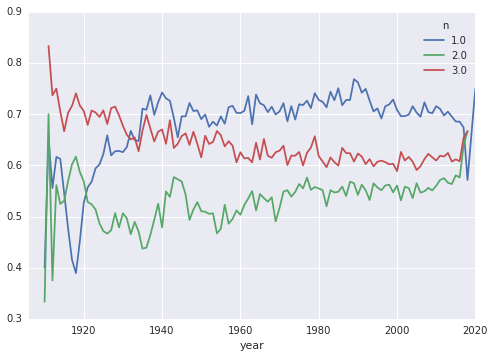

In [54]:
c = cast[cast.n <=3].groupby(['year', 'type', 'n']).size()
c = c.unstack(["type"])
d = c.actor/(c.actor+c.actress)
d = d.unstack("n")
d.plot()